In [1]:
import os
from tools.dataset import split_and_move_data, get_data_loaders
from tools.viz import show_batch

In [7]:
data_dir = "data/Data_x3"
dataset_dir = "dataset/Dataset_x3"

In [8]:
split_and_move_data(data_dir, dataset_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15)

Chia dữ liệu thành công:
Train: 5048 ảnh
Validation: 1082 ảnh
Test: 1082 ảnh


In [9]:
classes = os.listdir(data_dir)
for c in classes:
    files = os.listdir(f"{data_dir}/{c}")
    print(f'➜ {c} has {len(files)} files')

➜ normal has 3652 files
➜ osteoporosis has 3560 files
➜ osteopenia has 440 files


In [12]:
train_loader, val_loader, test_loader, classes = get_data_loaders(dataset_dir, 32, is_transform=True)
print(f"Classes: {classes}")

Classes: ['normal', 'osteoporosis']


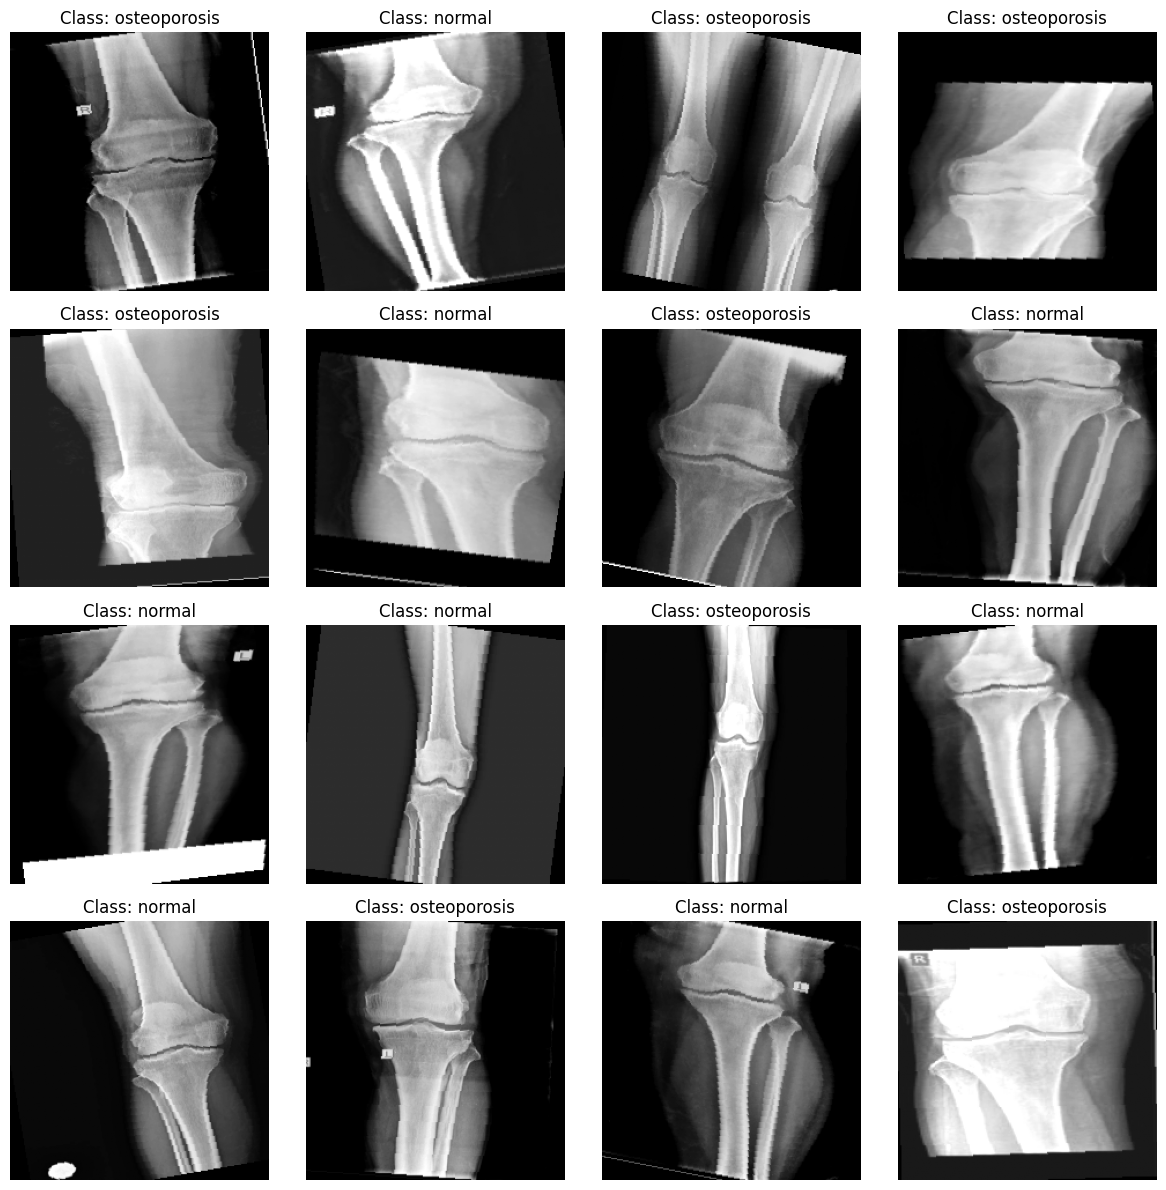

In [13]:
show_batch(train_loader)

# Models

In [14]:
from models.resnet50 import ResNet50
from models.vgg16 import VGG16
from tools.train import train_model, evaluate_model, DEVICE

🚀 CUDA available
💻 CUDA DEVICE count: 2
📦 Current DEVICE: 0
🖥️ DEVICE name: NVIDIA GeForce RTX 4090
💾 Total memory: 22683.50 MB
🧠 Allocated memory: 0.00 MB
📚 Reserved memory: 0.00 MB
✅ Selected DEVICE: cuda:0


## ResNet50

In [15]:
model_resnet = ResNet50(num_classes=len(classes)).to(DEVICE)

In [ ]:
'''
    Params:
    - model: Mô hình để huấn luyện
    - train_loader: Bộ dữ liệu đã được gom thành từng batch để train
    - val_loader: Bộ dữ liệu đã được gom thành từng batch để đánh giá trong lúc train
    **kwargs: các tham số khác
        + device = None
        + num_epochs: int = 100                     - số lượng epoch (mặc định 100)
        + lr: float = 1e-3                          - tốc độ học (mặc định 1e-3)
        + flag: str = model._get_name()             - tên file log quá trình training
        + early_stopping_patience: int = 10         - theo dõi 10 epoch gần nhất
        + early_stopping_delta: float = 1e-4        - nếu dao động nhỏ hơn 0.0001 thì dừng
        + loss: str = "CrossEntropy"                - tên hàm loss sử dụng [CrossEntropy, Focal, LabelSmoothing]
        + optimizer: str = "Adam"                   - tên hàm tối ưu [Adam, Adamw, Radam, Lookahead, Sgd]
        + focal_alpha: list = [0.25, 0.75]          - tham số cho hàm loss là 'Focal'
        + focal_gamma: float = 2.0                  - tham số cho hàm loss là 'Focal'
        + smoothing: float = 0.1                    - tham số cho hàm loss là 'LabelSmoothing'
'''

params = {
    "device": DEVICE,
    "num_epochs": 200
}
folder = train_model(model_resnet, train_loader, val_loader, **params)

🚀 New training saved at: training/ResNet50_20250704_202019/best.pth


➜ Epoch 1: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.36it/s]


Train Loss: 0.6362 | Train Acc: 0.6900 | Val Loss: 0.5167 | Val Acc: 0.7514 | AUC: 0.7540


/home/bbsw/osteoporosis/tools/train.py:220: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)


	💽 Saved best model at epoch 0


➜ Epoch 2: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.5389 | Train Acc: 0.7377 | Val Loss: 0.4679 | Val Acc: 0.7819 | AUC: 0.7833
	💽 Saved best model at epoch 1


➜ Epoch 3: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.33it/s]


Train Loss: 0.5307 | Train Acc: 0.7421 | Val Loss: 0.4505 | Val Acc: 0.7800 | AUC: 0.7817
	💽 Saved best model at epoch 2


➜ Epoch 4: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.40it/s]


Train Loss: 0.5078 | Train Acc: 0.7561 | Val Loss: 0.4551 | Val Acc: 0.7800 | AUC: 0.7811


➜ Epoch 5: 100%|██████████████████████████████████████████████████| 158/158 [00:30<00:00,  5.21it/s]


Train Loss: 0.5118 | Train Acc: 0.7611 | Val Loss: 0.6346 | Val Acc: 0.7107 | AUC: 0.7132


➜ Epoch 6: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.32it/s]


Train Loss: 0.4978 | Train Acc: 0.7623 | Val Loss: 0.4429 | Val Acc: 0.7902 | AUC: 0.7925
	💽 Saved best model at epoch 5


➜ Epoch 7: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.4986 | Train Acc: 0.7563 | Val Loss: 0.4464 | Val Acc: 0.7930 | AUC: 0.7944


➜ Epoch 8: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.42it/s]


Train Loss: 0.4745 | Train Acc: 0.7779 | Val Loss: 0.4166 | Val Acc: 0.8096 | AUC: 0.8116
	💽 Saved best model at epoch 7


➜ Epoch 9: 100%|██████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.39it/s]


Train Loss: 0.4693 | Train Acc: 0.7765 | Val Loss: 0.4536 | Val Acc: 0.7948 | AUC: 0.7966


➜ Epoch 10: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.30it/s]


Train Loss: 0.4669 | Train Acc: 0.7799 | Val Loss: 0.4004 | Val Acc: 0.8142 | AUC: 0.8156
	💽 Saved best model at epoch 9


➜ Epoch 11: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.31it/s]


Train Loss: 0.4583 | Train Acc: 0.7817 | Val Loss: 17.9079 | Val Acc: 0.4464 | AUC: 0.4515


➜ Epoch 12: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.4665 | Train Acc: 0.7906 | Val Loss: 0.4462 | Val Acc: 0.7911 | AUC: 0.7935


➜ Epoch 13: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.31it/s]


Train Loss: 0.4437 | Train Acc: 0.7958 | Val Loss: 0.4552 | Val Acc: 0.7921 | AUC: 0.7943


➜ Epoch 14: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.4464 | Train Acc: 0.7971 | Val Loss: 0.6738 | Val Acc: 0.6460 | AUC: 0.6423


➜ Epoch 15: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.35it/s]


Train Loss: 0.4481 | Train Acc: 0.7989 | Val Loss: 0.5527 | Val Acc: 0.7782 | AUC: 0.7793


➜ Epoch 16: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.39it/s]


Train Loss: 0.4290 | Train Acc: 0.7969 | Val Loss: 0.7455 | Val Acc: 0.5776 | AUC: 0.5830


➜ Epoch 17: 100%|█████████████████████████████████████████████████| 158/158 [00:30<00:00,  5.25it/s]


Train Loss: 0.3951 | Train Acc: 0.8209 | Val Loss: 0.3633 | Val Acc: 0.8364 | AUC: 0.8379
	💽 Saved best model at epoch 16


➜ Epoch 18: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.30it/s]


Train Loss: 0.3743 | Train Acc: 0.8340 | Val Loss: 0.3316 | Val Acc: 0.8651 | AUC: 0.8658
	💽 Saved best model at epoch 17


➜ Epoch 19: 100%|█████████████████████████████████████████████████| 158/158 [00:30<00:00,  5.23it/s]


Train Loss: 0.3506 | Train Acc: 0.8407 | Val Loss: 0.3737 | Val Acc: 0.8244 | AUC: 0.8262


➜ Epoch 20: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.32it/s]


Train Loss: 0.3436 | Train Acc: 0.8407 | Val Loss: 0.3518 | Val Acc: 0.8336 | AUC: 0.8353


➜ Epoch 21: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.32it/s]


Train Loss: 0.3455 | Train Acc: 0.8479 | Val Loss: 0.3057 | Val Acc: 0.8743 | AUC: 0.8743
	💽 Saved best model at epoch 20


➜ Epoch 22: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.3318 | Train Acc: 0.8528 | Val Loss: 0.2883 | Val Acc: 0.8845 | AUC: 0.8853
	💽 Saved best model at epoch 21


➜ Epoch 23: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.27it/s]


Train Loss: 0.3240 | Train Acc: 0.8586 | Val Loss: 0.3182 | Val Acc: 0.8623 | AUC: 0.8636


➜ Epoch 24: 100%|█████████████████████████████████████████████████| 158/158 [00:30<00:00,  5.25it/s]


Train Loss: 0.3106 | Train Acc: 0.8615 | Val Loss: 0.2807 | Val Acc: 0.8835 | AUC: 0.8844
	💽 Saved best model at epoch 23


➜ Epoch 25: 100%|█████████████████████████████████████████████████| 158/158 [00:30<00:00,  5.26it/s]


Train Loss: 0.2940 | Train Acc: 0.8700 | Val Loss: 0.3910 | Val Acc: 0.8290 | AUC: 0.8308


➜ Epoch 26: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.30it/s]


Train Loss: 0.2977 | Train Acc: 0.8659 | Val Loss: 0.2665 | Val Acc: 0.8817 | AUC: 0.8813
	💽 Saved best model at epoch 25


➜ Epoch 27: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.40it/s]


Train Loss: 0.2752 | Train Acc: 0.8782 | Val Loss: 0.2471 | Val Acc: 0.8993 | AUC: 0.8996
	💽 Saved best model at epoch 26


➜ Epoch 28: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.38it/s]


Train Loss: 0.2767 | Train Acc: 0.8778 | Val Loss: 0.2621 | Val Acc: 0.8937 | AUC: 0.8939


➜ Epoch 29: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.44it/s]


Train Loss: 0.2595 | Train Acc: 0.8849 | Val Loss: 0.2569 | Val Acc: 0.9011 | AUC: 0.9012


➜ Epoch 30: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.38it/s]


Train Loss: 0.2480 | Train Acc: 0.8942 | Val Loss: 0.3248 | Val Acc: 0.8614 | AUC: 0.8629


➜ Epoch 31: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.43it/s]


Train Loss: 0.2453 | Train Acc: 0.8960 | Val Loss: 0.3163 | Val Acc: 0.8392 | AUC: 0.8375


➜ Epoch 32: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.41it/s]


Train Loss: 0.2400 | Train Acc: 0.8994 | Val Loss: 0.2029 | Val Acc: 0.9122 | AUC: 0.9127
	💽 Saved best model at epoch 31


➜ Epoch 33: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.31it/s]


Train Loss: 0.2272 | Train Acc: 0.9075 | Val Loss: 0.1924 | Val Acc: 0.9288 | AUC: 0.9292
	💽 Saved best model at epoch 32


➜ Epoch 34: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.44it/s]


Train Loss: 0.2226 | Train Acc: 0.9091 | Val Loss: 0.2374 | Val Acc: 0.9057 | AUC: 0.9065


➜ Epoch 35: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.44it/s]


Train Loss: 0.2078 | Train Acc: 0.9156 | Val Loss: 0.3747 | Val Acc: 0.8475 | AUC: 0.8493


➜ Epoch 36: 100%|█████████████████████████████████████████████████| 158/158 [00:28<00:00,  5.58it/s]


Train Loss: 0.1990 | Train Acc: 0.9154 | Val Loss: 0.1861 | Val Acc: 0.9298 | AUC: 0.9302
	💽 Saved best model at epoch 35


➜ Epoch 37: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.40it/s]


Train Loss: 0.2055 | Train Acc: 0.9174 | Val Loss: 0.2012 | Val Acc: 0.9150 | AUC: 0.9143


➜ Epoch 38: 100%|█████████████████████████████████████████████████| 158/158 [00:28<00:00,  5.45it/s]


Train Loss: 0.1969 | Train Acc: 0.9198 | Val Loss: 0.2040 | Val Acc: 0.9113 | AUC: 0.9120


➜ Epoch 39: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.28it/s]


Train Loss: 0.1801 | Train Acc: 0.9297 | Val Loss: 0.1674 | Val Acc: 0.9372 | AUC: 0.9371
	💽 Saved best model at epoch 38


➜ Epoch 40: 100%|█████████████████████████████████████████████████| 158/158 [00:32<00:00,  4.82it/s]


Train Loss: 0.1870 | Train Acc: 0.9208 | Val Loss: 0.1883 | Val Acc: 0.9168 | AUC: 0.9175


➜ Epoch 41: 100%|█████████████████████████████████████████████████| 158/158 [00:31<00:00,  4.99it/s]


Train Loss: 0.1786 | Train Acc: 0.9283 | Val Loss: 0.1610 | Val Acc: 0.9409 | AUC: 0.9411
	💽 Saved best model at epoch 40


➜ Epoch 42: 100%|█████████████████████████████████████████████████| 158/158 [00:29<00:00,  5.31it/s]
Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 244, in _feed
    obj = _ForkingPickler.dumps(obj)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 51, in dumps
    cls(buf, protocol).dump(obj)
  File "/home/bbsw/osteoporosis/venv/lib/python3.10/site-packages/torch/multiprocessing/reductions.py", line 619, in reduce_storage
    df = multiprocessing.reduction.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/reduction.py", line 198, in DupFd
    return resource_sharer.DupFd(fd)
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 53, in __init__
    self._id = _resource_sharer.register(send, close)
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 76, in register
    self._start()
  File "/usr/lib/python3.10/multiprocessing/resource_sharer.py", line 126, in _start
    self._listener = 

KeyboardInterrupt: 

In [ ]:
print("Evaluating ResNet-50")
evaluate_model(model_resnet, test_loader, os.path.join(folder, "best.pth"), classes, folder)

Evaluating ResNet-50...
Test Accuracy: 0.9103
Test Precision: 0.9253
Test Recall: 0.8895
Test F1-Score: 0.9070
Test AUC: 0.9100


## VGG16

In [ ]:
model_vgg = VGG16(num_classes=len(classes)).to(DEVICE)

📊 Total parameters: 134,276,034
🧠 Trainable parameters: 134,276,034


In [ ]:
params = {
    "device": DEVICE,
    "num_epochs": 200
}
folder = train_model(model_vgg, train_loader, val_loader, **params)

🚀 New training saved at: training/VGG16/best_VGG16.pth


Epoch 0: 100%|████████████████████████████████████████████████████| 107/107 [00:13<00:00,  8.08it/s]


Train Loss: 3.5055 | Train Acc: 0.5391
Val Loss: 0.6708 | Val Acc: 0.5450 | AUC: 0.5366


/home/bbsw/osteoporosis/train.py:357: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
Epoch 1: 100%|████████████████████████████████████████████████████| 107/107 [00:13<00:00,  8.07it/s]


Train Loss: 0.9852 | Train Acc: 0.5561
Val Loss: 0.6774 | Val Acc: 0.5640 | AUC: 0.5717


Epoch 2: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.55it/s]


Train Loss: 0.8985 | Train Acc: 0.5736
Val Loss: 0.6159 | Val Acc: 0.5531 | AUC: 0.5612


Epoch 3: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.47it/s]


Train Loss: 0.7573 | Train Acc: 0.5613
Val Loss: 0.6526 | Val Acc: 0.6349 | AUC: 0.6285


Epoch 4: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.48it/s]


Train Loss: 0.6729 | Train Acc: 0.5864
Val Loss: 0.6572 | Val Acc: 0.6267 | AUC: 0.6206


Epoch 5: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.57it/s]


Train Loss: 0.6839 | Train Acc: 0.5456
Val Loss: 0.6489 | Val Acc: 0.5586 | AUC: 0.5503


Epoch 6: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.62it/s]


Train Loss: 0.7185 | Train Acc: 0.5374
Val Loss: 0.6940 | Val Acc: 0.5095 | AUC: 0.5000


Epoch 7: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.61it/s]


Train Loss: 0.6948 | Train Acc: 0.5099
Val Loss: 0.6925 | Val Acc: 0.5123 | AUC: 0.5028


Epoch 8: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.61it/s]


Train Loss: 0.6970 | Train Acc: 0.5117
Val Loss: 0.6889 | Val Acc: 0.5259 | AUC: 0.5167


Epoch 9: 100%|████████████████████████████████████████████████████| 107/107 [00:19<00:00,  5.59it/s]


Train Loss: 0.6875 | Train Acc: 0.5386
Val Loss: 0.6656 | Val Acc: 0.6022 | AUC: 0.5952


Epoch 10:   0%|                                                             | 0/107 [00:00<?, ?it/s]

In [ ]:
print("Evaluating VGG16...")
evaluate_model(model_vgg, test_loader, os.path.join(folder, "best.pth"), classes, folder)

Evaluating VGG16...
Test Accuracy: 0.5190
Test Precision: 0.5060
Test Recall: 0.9392
Test F1-Score: 0.6576
Test AUC: 0.5258
